<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9C.%D0%91.%D0%A1./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4 лабораторная

Blocked
0.6
cnt1 =  600
0.5934303402594008


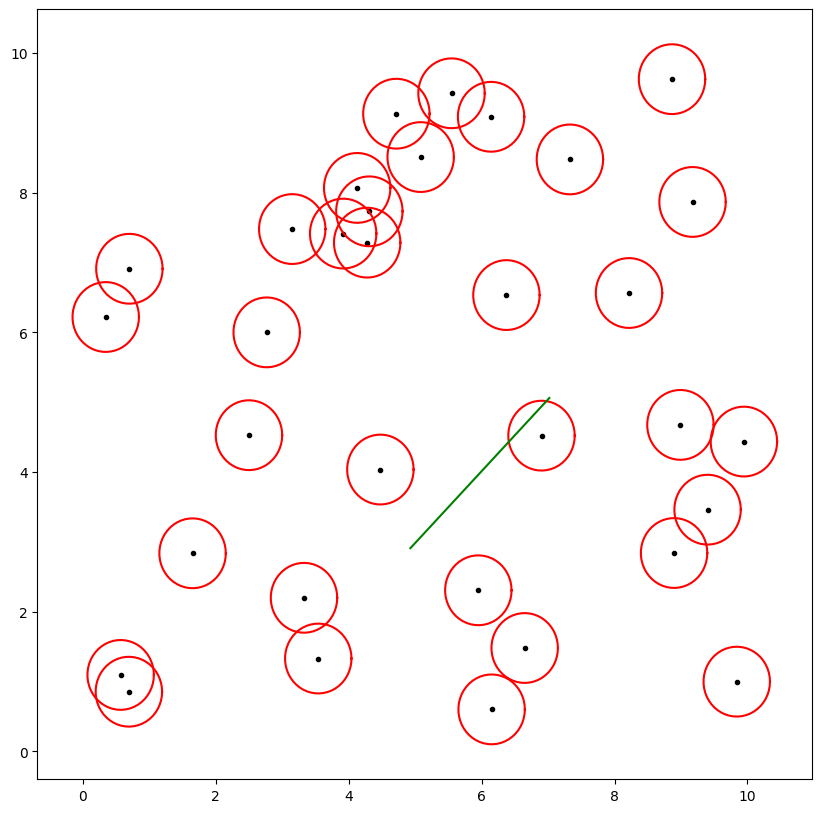

In [28]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Начальные значения
A = 10  # размер зоны
q = 0.3  # lambda для распределения пуассона
cir_r = 0.5  # радиус круга
dist = 3  # расстояние между объектами

# считаются координаты круга
def plot_circle(x, y, r):
    angels = np.linspace(0, 2 * np.pi, 50)
    cirX = x + r * np.cos(angels)
    cirY = y + r * np.sin(angels)
    plt.plot(cirX, cirY, "r")

# пуасоновские точки
def poisson_points(l, area):
    num_block = np.random.poisson(l * area**2)
    x = np.random.uniform(0, area, size=num_block)
    y = np.random.uniform(0, area, size=num_block)
    return x, y

# вычисляет расстояние от точки c до отрезка
def check_dist(a, b, c):
    ca = (c - a) / norm(c - a)
    ba = (b - a) / norm(b - a)
    cb = (c - b) / norm(c - b)
    ab = (a - b) / norm(a - b)

    if np.arccos(np.dot(ca, ba)) > 1:
        return norm(c - a)
    if np.arccos(np.dot(cb, ab)) > 1:
        return norm(c - b)
    return norm(np.cross(a - b, a - c)) / norm(b - a)

# пересечение круга отрезком
def iscrossing(x, y, x1, y1, x2, y2, cir_r):
    for i in range(len(x)):
        distance = np.round(check_dist(np.array([x1, y1]), np.array([x2, y2]), np.array([x[i], y[i]])), 1)
        if distance <= cir_r:
            return True
    return False

# генерация пуассоновских точек
x, y = poisson_points(q, A)

angl = np.random.uniform(0, 2 * np.pi)

# координаты линии
x1, y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angl)
y2 = y1 + dist * np.sin(angl)

# отрисовка модели
plt.figure(figsize=(10, 10))
plt.plot(x, y, ".k")
for i in range(len(x)):
    plot_circle(x[i], y[i], cir_r)

plt.plot([x1, x2], [y1, y2], "-g")

# проверка на пересечение
if iscrossing(x, y, x1, y1, x2, y2, cir_r):
    print("Blocked")
else:
    print("Free")


cnt1 = 0
for i in range(1000):
    x, y = poisson_points(q, A)
    angl = np.random.uniform(0, 2 * np.pi)
    x1, y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angl)
    y2 = y1 + dist * np.sin(angl)

    if iscrossing(x, y, x1, y1, x2, y2, cir_r):
        cnt1 += 1
print(cnt1 / 1000)
print("cnt1 = ",cnt1)

# теоретическая вероятность
S = 2 * cir_r * dist
l = q * S
prob = 1 - np.exp(-l)
print(prob)


5 лабораторная

In [29]:
ang_dist = 3 #расстояния на графике длины линий видимости
ang_size = np.pi/2 #размер угла видимости

In [30]:
def plot_angl(x1,y1, rand_angl, draw=True): # функция, которая вычисляет координаты точек на основе заданного угла и расстояния,x1,y1: координаты начальной точки
    x2 = x1 + ang_dist * np.cos(rand_angl)  # rand_angl: случайный угол в радианах, относительно которого вычисляется видимость
    y2 = y1 + ang_dist * np.sin(rand_angl)  # x2, y2: координаты точки, находящейся на расстоянии ang_dist от точки (x1, y1) под углом rand_angl
    x3 = x1 + ang_dist * np.cos(rand_angl + ang_size) # x3, y3: координаты точки, находящейся на расстоянии ang_dist от точки (x1, y1) под углом rand_angl + ang_size
    y3 = y1 + ang_dist * np.sin(rand_angl + ang_size)
    if draw: # если draw равно True, функция рисует две линии: одну от (x1, y1) до (x2, y2) и другую от (x1, y1) до (x3, y3) ГОЛУБАЯ ПУНКТИРНАЯ
        plt.plot([x1,x2], [y1,y2], "--b", )
        plt.plot([x1,x3], [y1,y3], "--b", )
        return x2,y2,x3,y3 # возвращаются координаты (x2, y2) и (x3, y3)
    else:
        return x2,y2,x3,y3 # возвращаются координаты (x2, y2) и (x3, y3)

In [31]:
def cart2pol(x, y): # функция преобразует декартовы координаты (x, y) в полярные координаты
    rho = np.sqrt(x**2 + y**2) # радиус вычисляется как длина отрезка от начала координат до точки. Это делается с помощью теоремы Пифагора
    phi = np.arctan2(y, x) # функция вычисляет угол
    return(rho, phi) # возвращается радиус и угол в радианах

In [32]:
def check_visibility(): # проверяет, видима ли одна точка из другой, основываясь на их полярных координатах
    r1 = cart2pol(a1x2-x1, a1y2-y1)[1] if cart2pol(a1x2-x1, a1y2-y1)[1] >= 0 else cart2pol(a1x2-x1, a1y2-y1)[1] + np.pi*2 # для каждой из точек функция используется для вычисления углов относительно других точек
    g1 = cart2pol(x2-x1, y2-y1)[1] if cart2pol(x2-x1, y2-y1)[1] >= 0 else cart2pol(x2-x1, y2-y1)[1] + np.pi*2 # если угол отрицательный,то добавляется 2π, чтобы получить положительное значение
    b1 = cart2pol(a1x3-x1, a1y3-y1)[1] if cart2pol(a1x3-x1, a1y3-y1)[1] >= 0 else cart2pol(a1x3-x1, a1y3-y1)[1] + np.pi*2
    # r1, g1, b1: углы для первой точки (относительно точки (x1, y1))
    # r2, g2, b2: углы для второй точки (относительно точки (x2, y2))
    r2 = cart2pol(a2x2-x2, a2y2-y2)[1] if cart2pol(a2x2-x2, a2y2-y2)[1] >= 0 else cart2pol(a2x2-x2, a2y2-y2)[1] + np.pi*2
    g2 = cart2pol(x1-x2, y1-y2)[1] if cart2pol(x1-x2, y1-y2)[1] >= 0 else cart2pol(x1-x2, y1-y2)[1] + np.pi*2
    b2 = cart2pol(a2x3-x2, a2y3-y2)[1] if cart2pol(a2x3-x2, a2y3-y2)[1] >= 0 else cart2pol(a2x3-x2, a2y3-y2)[1] + np.pi*2

    if g1 > r1 and g1 < b1 and g2 > r2 and g2 < b2: # проверяет, находится ли угол g1 между углами r1 и b1, а угол g2 — между r2 и b2
        return True
    else:
        return False
# если оба условия выполняются, функция возвращает True(это значит, что точка видима из другой точки), иначе выводится False

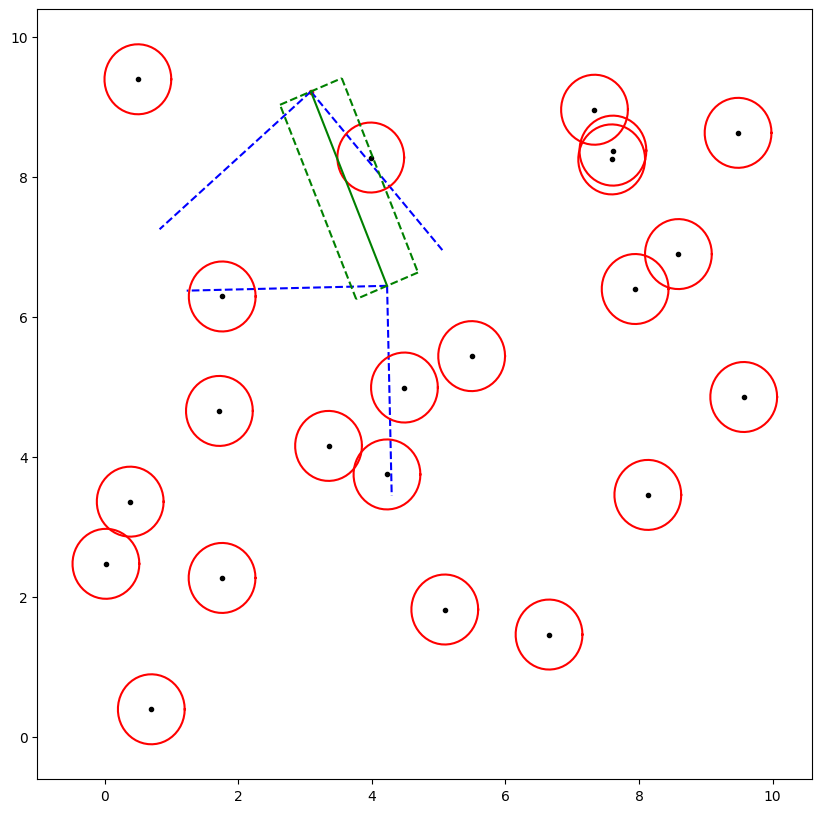

In [33]:
x_cir,y_cir = poisson_points(q, A) # функция, которая, генерирует точки по распределению Пуассона

# создается случайный угол и начальные координаты линии (x1, y1)
angl = np.random.uniform(0, 2*np.pi)

# конечные координаты (x2, y2) вычисляются с использованием заданного расстояния dist и угла angl
x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angl)
y2 = y1 + dist * np.sin(angl)

xA, yA, xB, yB, xC, yC, xD, yD = create_rect(x1,y1,x2,y2,angl) # функция создает координаты четырех углов прямоугольника на основе координат линии и угла

plt.figure(figsize=(10,10)) # cоздается график, и на него наносится точка (x1, y1) красного цвета
plt.plot(x1,y1,".r")

a1x2, a1y2, a1x3, a1y3 = plot_angl(x1,y1,np.random.uniform(0, 2*np.pi)) # рисуются углы в точках (x1, y1) и (x2, y2)
a2x2, a2y2, a2x3, a2y3 = plot_angl(x2,y2,np.random.uniform(0, 2*np.pi))

plt.plot(x_cir, y_cir, ".k") #  рисуются круги на основе сгенерированных точек
for i in range(len(x_cir)):
    plot_circle(x_cir[i], y_cir[i], cir_r)

plt.plot([x1,x2], [y1,y2], "-g") # линия между точками (x1, y1) и (x2, y2) отображается зеленым цветом.

# рисуется прямоугольник с использованием пунктирных линий
plt.plot([xA, xB], [yA, yB], "--g")
plt.plot([xB, xC], [yB, yC], "--g")
plt.plot([xC, xD], [yC, yD], "--g")
plt.plot([xD, xA], [yD, yA], "--g")

In [34]:
if iscrossing(x, y, x1, y1, x2, y2, cir_r): # функция проверяет, пересекается ли линия, заданная координатами (x1, y1) и (x2, y2), с кругом, центром (x, y) и радиусом cir_r
    print("Blocked")
else:
    print("Free") # если пересечение происходит, выводится сообщение "Blocked", иначе — "Free".

if check_visibility(): # функция проверяет, видима ли какая-то точка или объект с учетом препятствий
    print("Visible")
else:
    print("NOT visible") # если объект виден, выводится сообщение "Visible", иначе — "NOT visible".

Blocked
NOT visible


In [35]:
N = 1000 # количество реализаций
cnt = 0 #  подсчета случаев, когда линия пересекается с окружностью и видима

for i in range(N): # цикл выполняется N раз, генерируя случайные линии и окружности

    x,y = poisson_points(q, A) # генерируются случайные точки с параметрами q и A


    angl = np.random.uniform(0, 2*np.pi) # создается случайный угол и начальная точка (x1, y1) для линии


    x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angl)
    y2 = y1 + dist * np.sin(angl) # конечные координаты (x2, y2) вычисляются с использованием заданного расстояния dist


    a1x2, a1y2, a1x3, a1y3 = plot_angl(x1,y1,np.random.uniform(0, 2*np.pi), draw=False) # эти функции рисуют углы в точках (x1, y1) и (x2, y2)
    a2x2, a2y2, a2x3, a2y3 = plot_angl(x2,y2,np.random.uniform(0, 2*np.pi), draw=False)

    if iscrossing(x, y, x1, y1, x2, y2, cir_r) and check_visibility(): # если линия пересекает окружность и видима, счетчик cnt увеличивается на 1
        cnt += 1
print(cnt/N) # выводится доля случаев, когда линия пересекалась с окружностью и была видима
print("cnt = ", cnt)

0.021
cnt =  21
